In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('./input/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
mcq = pd.read_csv('./input/multipleChoiceResponses.csv',
                    encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

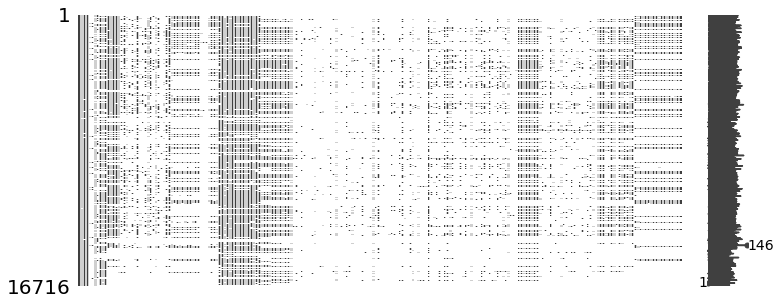

In [7]:
import missingno as msno

msno.matrix(mcq, figsize=(12, 5))

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

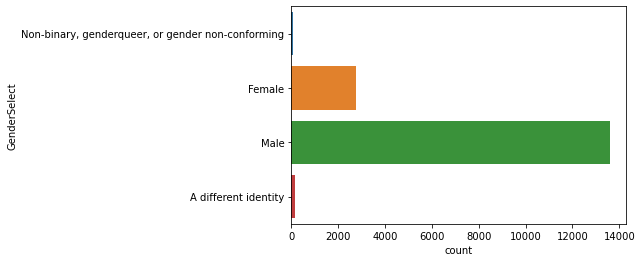

In [8]:
sns.countplot(y='GenderSelect', data=mcq)

In [9]:
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['res cnt', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,res cnt,country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [10]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

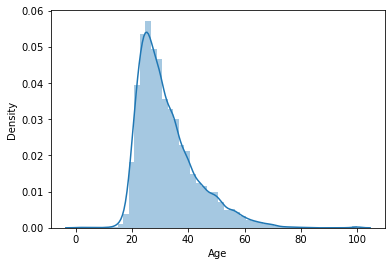

In [11]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

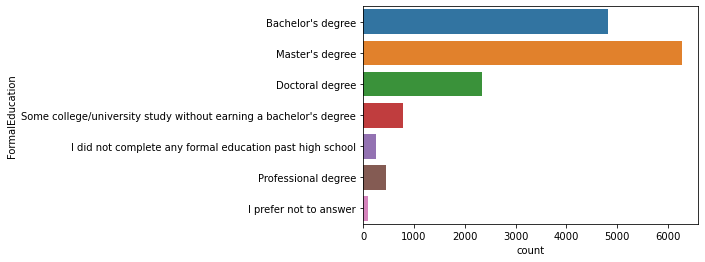

In [12]:
sns.countplot(y='FormalEducation', data=mcq)

In [13]:
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

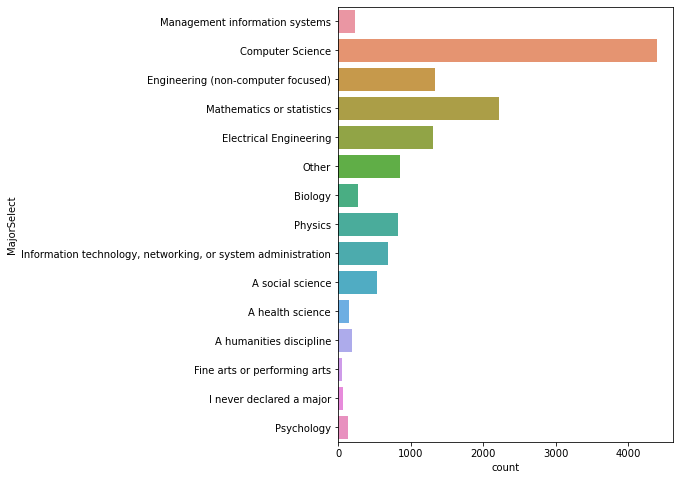

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [15]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['res cnt', 'ratio']
mcq_es_df

,res cnt,ratio
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

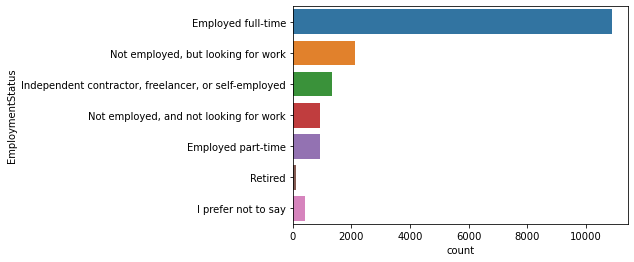

In [16]:
sns.countplot(y='EmploymentStatus', data=mcq)

<AxesSubplot:xlabel='count', ylabel='Tenure'>

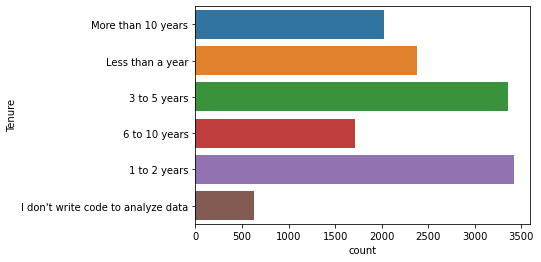

In [17]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


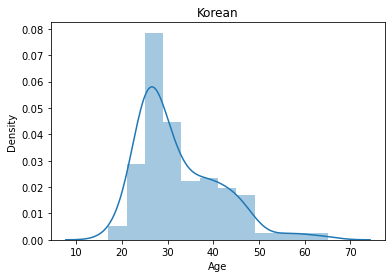

In [18]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [19]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

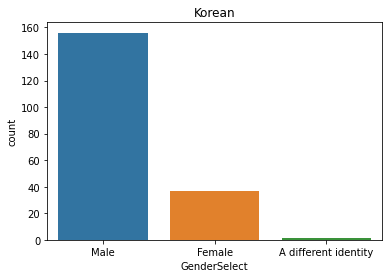

In [20]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

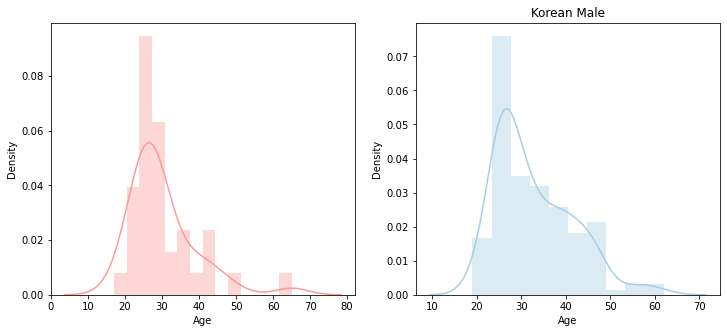

In [21]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('Korean Male')

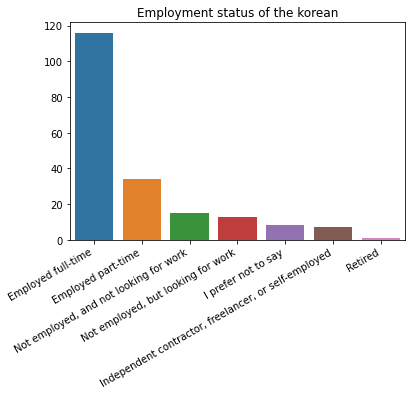

In [22]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

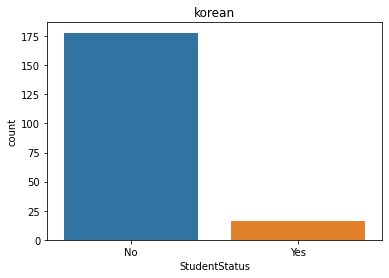

In [23]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [24]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

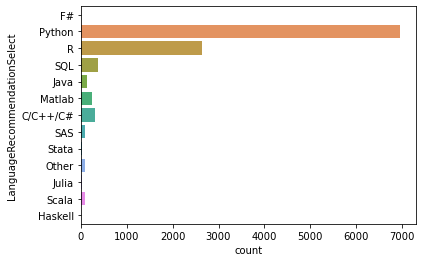

In [25]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

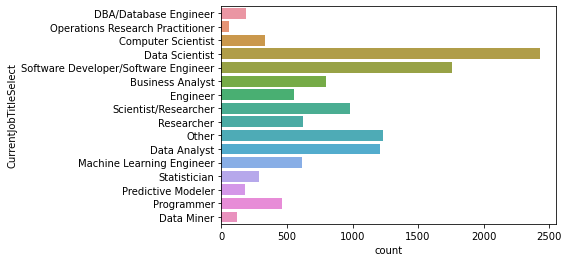

In [26]:
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [27]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

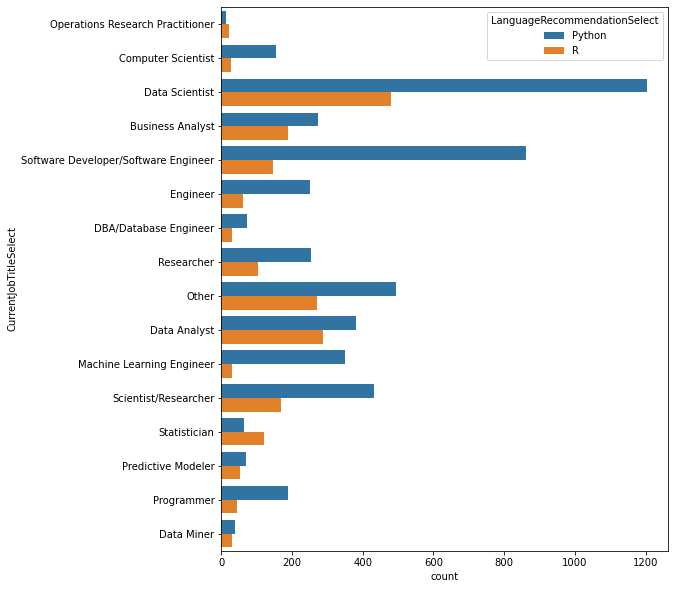

In [28]:
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect',
            hue='LanguageRecommendationSelect',
            data=data)

In [29]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent,
    left_index=True,
    right_index=True).head(20)
mcq_ml_tool_df.columns = ['res cnt', 'ratio']
mcq_ml_tool_df

,res cnt,ratio
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

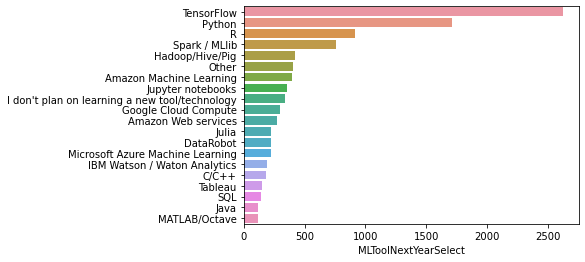

In [30]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

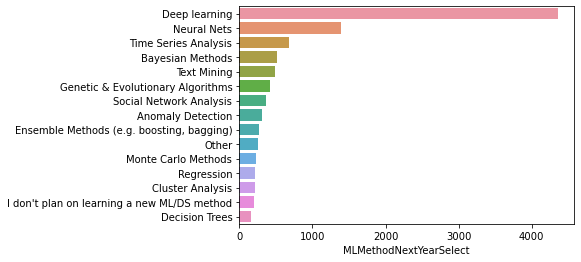

In [31]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [32]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str')
s = mcq.apply(
    lambda x : pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

<AxesSubplot:xlabel='platform'>

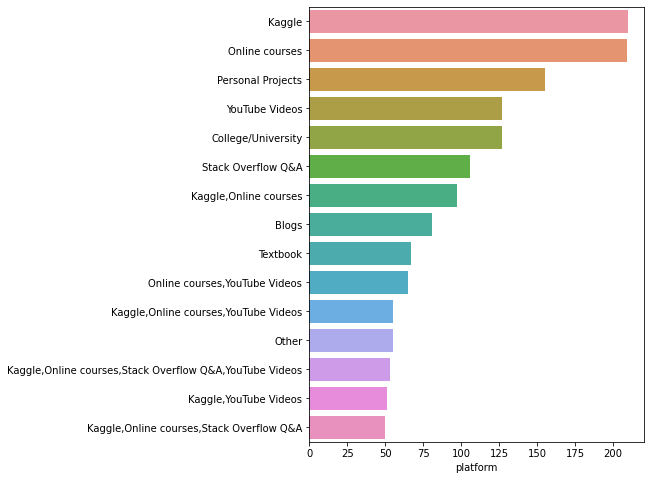

In [33]:
plt.figure(figsize=(6, 8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [34]:
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [35]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

<AxesSubplot:>

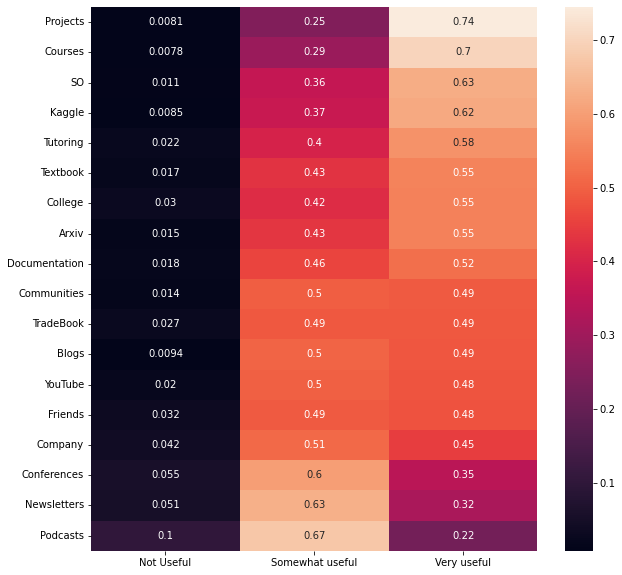

In [36]:
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values('Very useful', ascending=False), annot=True)

<AxesSubplot:title={'center':'Usefullness of Learning Platforms'}>

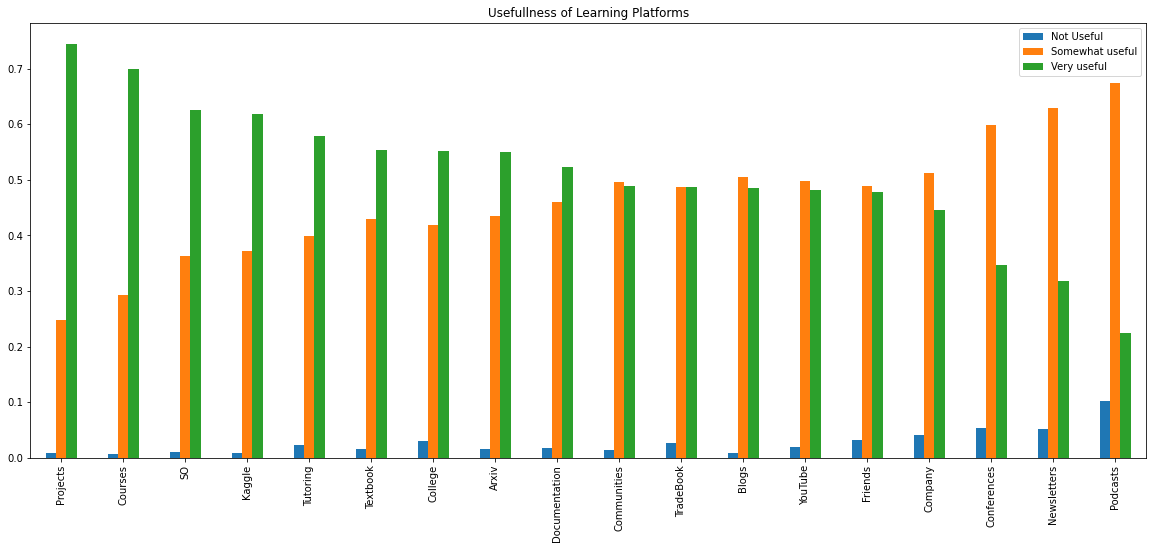

In [37]:
fdf.plot(kind='bar', figsize=(20,8),
        title="Usefullness of Learning Platforms")

In [38]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [39]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

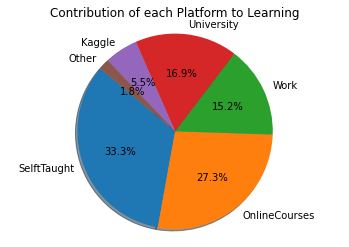

In [40]:
plt.figure(facecolor='white')
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

In [41]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [42]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [43]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(
    lambda x: x.split(','))
s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack(
).reset_index(level=1, drop=True)
s.name = 'hardware'

In [44]:
s = s[s != 'nan']

In [45]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


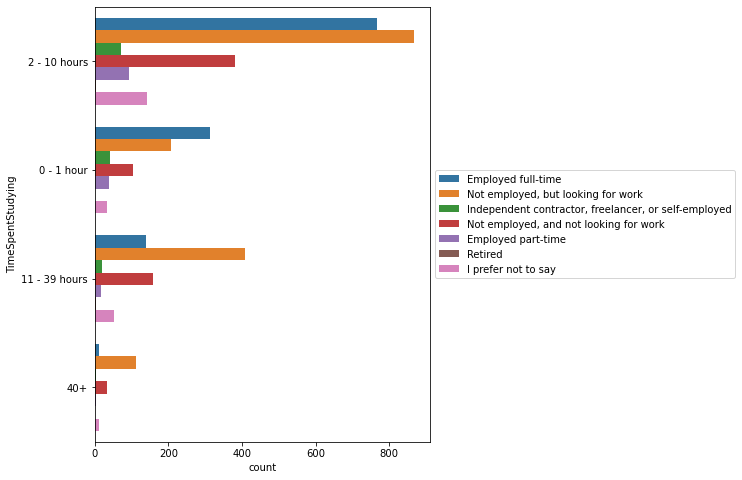

In [46]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus').legend(
   loc='center left', bbox_to_anchor=(1, 0.5))

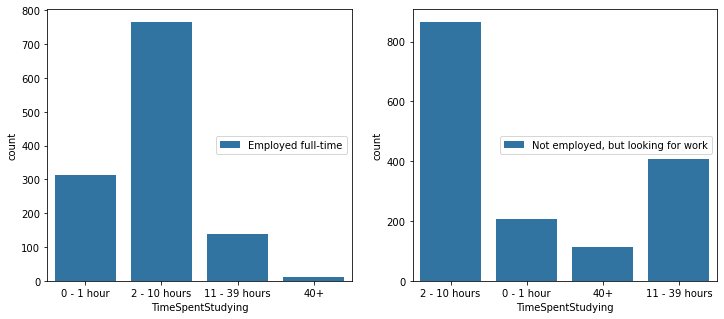

In [47]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax1).legend(
    loc='center right', bbox_to_anchor=(1, 0.5))
sns.countplot(x='TimeSpentStudying', data=looking_for_job, hue='EmploymentStatus', ax=ax2).legend(
    loc='center right', bbox_to_anchor=(1, 0.5))